In [19]:
import torch
import pyro
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [10]:
true_coefs = torch.tensor([1., 2., 3.])
data = torch.randn(2000, 3)
dim = 3
labels = pyro.distributions.Bernoulli(logits=(true_coefs * data).sum(-1)).sample()

In [11]:
def model(data):
    coefs_mean = torch.zeros(dim)
    coefs = pyro.sample('beta', pyro.distributions.Normal(coefs_mean, torch.ones(3)))
    y = pyro.sample('y', pyro.distributions.Bernoulli(logits=(coefs * data).sum(-1)), obs=labels)
    return y

hmc_kernel = pyro.infer.HMC(model, step_size=0.0855, num_steps=4)
mcmc = pyro.infer.MCMC(hmc_kernel, num_samples=500, warmup_steps=100)
mcmc.run(data)
mcmc.get_samples()['beta'].mean(0)  

Sample: 100%|█| 600/600 [00:00, 896.54it/s, step size=4.81e-01, acc. prob=0.959]


tensor([1.0582, 1.8807, 2.7961])

In [34]:
(true_coefs * data).sum(-1)

tensor([ 4.7818, -0.4584, -1.3163,  ..., -1.9061, -0.0317,  1.7577])

In [18]:
import numpy as np

In [15]:
data_ar = np.array(data)

(array([  1.,   6.,   3.,   3.,   5.,   8.,  17.,  15.,  11.,  34.,  31.,
         43.,  45.,  40.,  48.,  50.,  56.,  75.,  57.,  72.,  94.,  86.,
         97., 112., 105.,  90.,  77.,  77.,  88.,  70.,  69.,  75.,  61.,
         48.,  49.,  25.,  38.,  28.,  24.,  15.,  13.,  11.,   9.,   5.,
          1.,   7.,   1.,   1.,   2.,   2.]),
 array([-2.9011412 , -2.7793105 , -2.6574798 , -2.5356488 , -2.4138181 ,
        -2.2919874 , -2.1701567 , -2.048326  , -1.9264952 , -1.8046645 ,
        -1.6828337 , -1.561003  , -1.4391723 , -1.3173414 , -1.1955107 ,
        -1.07368   , -0.9518492 , -0.8300185 , -0.70818776, -0.586357  ,
        -0.46452627, -0.34269553, -0.22086479, -0.09903404,  0.02279671,
         0.14462745,  0.26645818,  0.38828894,  0.5101197 ,  0.63195044,
         0.7537812 ,  0.8756119 ,  0.99744266,  1.1192734 ,  1.2411041 ,
         1.362935  ,  1.4847656 ,  1.6065964 ,  1.7284272 ,  1.8502579 ,
         1.9720886 ,  2.0939193 ,  2.2157502 ,  2.337581  ,  2.4594116 ,
 

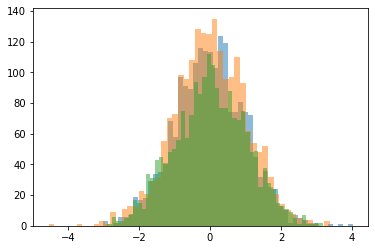

In [25]:
plt.hist(data_ar[:,0],bins=50,alpha=0.5)
plt.hist(data_ar[:,1],bins=50,alpha=0.5)
plt.hist(data_ar[:,2],bins=50,alpha=0.5)

In [ ]:
def my_model(para):
    